In [2]:
from fpylll import IntegerMatrix, FPLLL, GSO, LLL, BKZ, SVP
from copy import copy
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
#compute norm(b1) / det(L)^(1/n)
def score(B):
    norm = B[0].norm()
    
    B_GSO = GSO.Mat(B)
    B_GSO.update_gso()
    root_det = np.sqrt(B_GSO.get_root_det(0,-1))
    
    return (1/B_GSO.d) * np.log2(norm / root_det)

In [17]:
iters = 5
b = 10
block_sizes = [2,10,20,30,40]
n_vals = range(45,60)

#Options are uniform, g-m, ajtai, knapsack
matrix_type = "g-m"

#BKZ.SD_VARIANT = True

lll_times = np.zeros(len(n_vals)*iters)
bkz_times = np.zeros((len(block_sizes), len(n_vals)*iters))
lll_avg_times = np.zeros(len(n_vals))
bkz_avg_times = np.zeros((len(block_sizes), len(n_vals)))

lll_scores = np.zeros(len(n_vals)*iters)
bkz_scores = np.zeros((len(block_sizes), len(n_vals)*iters))
lll_avg_scores = np.zeros(len(n_vals))
bkz_avg_scores = np.zeros((len(block_sizes), len(n_vals)))

n_vals_plot = np.zeros(len(n_vals)*iters)

for i in range(len(n_vals)):
    n = n_vals[i]
    print("Now on n=" + str(n))
        
    for j in range(iters):
        A = IntegerMatrix(n,n)
        #A.randomize("uniform", bits=b)
        A.randomize("trg", alpha=1.2)
        #A.randomize("intrel", bits=100*n)
        #A.randomize("qary", k=1, q=5901031)
        A_orig = copy(A)
        
        n_vals_plot[i*iters + j] += n

        #Run LLL
        start = time()
        A_lll = LLL.reduction(A, delta=0.999, eta=0.501, method='fast')
        A = copy(A_orig)
        
        #Record data from LLL
        cur_score = score(A_lll)
        cur_time = time() - start

        lll_scores[i*iters + j] += cur_score
        lll_times[i*iters + j] += cur_time

        lll_avg_scores[i] += cur_score / iters
        lll_avg_times[i] += cur_time / iters

        for k in range(len(block_sizes)):
            #Run BKZ
            block_size = block_sizes[k]
            print("Now on block size k=" + str(block_size))
            start = time()
            A_bkz = BKZ.reduction(A, BKZ.Param(block_size))
            A = copy(A_orig)

            #Record data from BKZ
            cur_score = score(A_bkz)
            cur_time = time() - start
            
            bkz_scores[k][i*iters + j] += cur_score
            bkz_times[k][i*iters + j] += cur_time
            
            bkz_avg_scores[k][i] += cur_score / iters
            bkz_avg_times[k][i] += cur_time / iters

#put data into dataframe for plotting with seaborn

Now on n=45
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on n=46
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k

Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40
Now on block size k=2
Now on block size k=10
Now on block size k=20
Now on block size k=30
Now on block size k=40


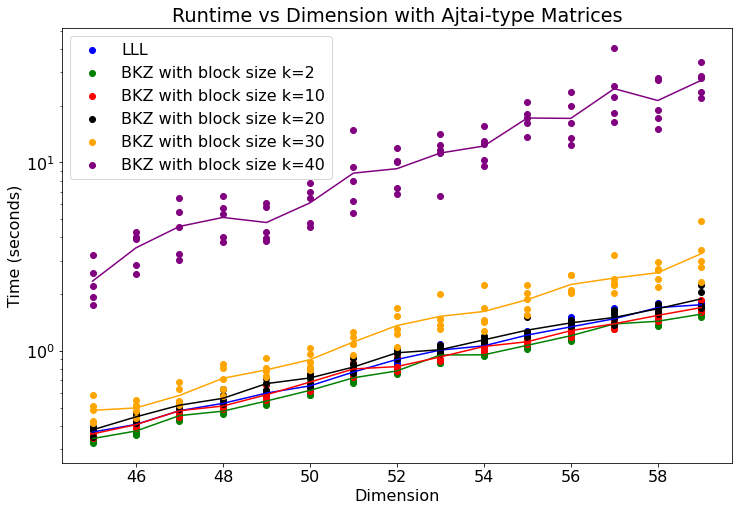

In [18]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.title("Runtime vs Dimension with Ajtai-type Matrices")
plt.ylabel("Time (seconds)")
plt.xlabel("Dimension")
colors = ["blue","green", "red", "black", "orange", "purple"]
plt.yscale("log")

plt.scatter(n_vals_plot, lll_times, label = 'LLL', c=colors[0])
plt.plot(n_vals, lll_avg_times, c=colors[0])
for i in range(len(block_sizes)):
    plt.scatter(n_vals_plot, bkz_times[i], label = 'BKZ with block size k=' + str(block_sizes[i]), c=colors[i+1])
    plt.plot(n_vals, bkz_avg_times[i], c=colors[i+1])
plt.legend()

plt.show()

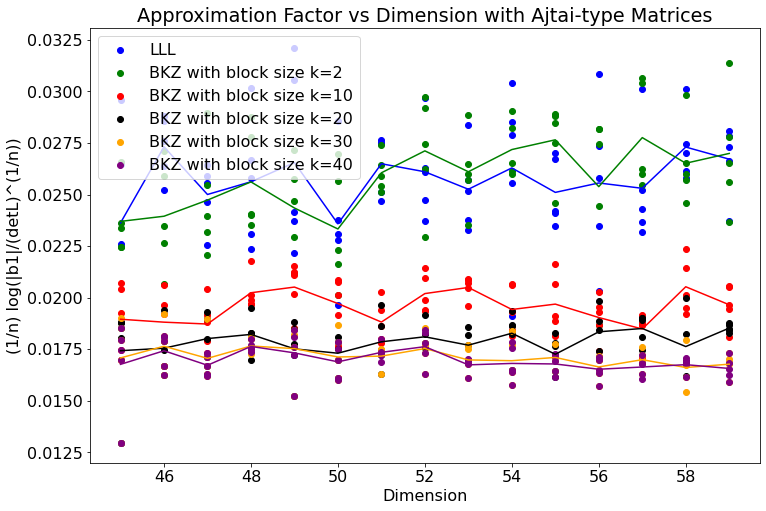

In [19]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.title("Approximation Factor vs Dimension with Ajtai-type Matrices")
plt.ylabel("(1/n) log(|b1|/(detL)^(1/n))")
plt.xlabel("Dimension")
colors = ["blue","green", "red", "black", "orange", "purple"]

plt.scatter(n_vals_plot, lll_scores, label = 'LLL', c=colors[0])
plt.plot(n_vals, lll_avg_scores, c=colors[0])
for i in range(len(block_sizes)):
    plt.scatter(n_vals_plot, bkz_scores[i], label = 'BKZ with block size k=' + str(block_sizes[i]), c=colors[i+1])
    plt.plot(n_vals, bkz_avg_scores[i], c=colors[i+1])
plt.legend()

plt.show()